### Import your libraries

In [53]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Load your dataset

In [54]:
data = pd.read_csv('HR_Missing_Vslues.csv')
# data

### Explore your data 

* First 5 recods
* Last 5 records 
* Check data type
* Show statistical summary 
* Is there any missing values ?
* Applay two more data analysis from your choose 

In [55]:
data.head()

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
0,"Adinolfi, Wilson K",10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0
1,"Ait Sidi, Karthikeyan",10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0
2,"Akinkuolie, Sarah",10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0
3,"Alagbe,Trina",10088,64991.0,19,Production Technician I,NaN,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0
4,NaN,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,9/6/2016,Production,Webster Butler,39.0,Google Search,2.0


In [ ]:
data.tail()

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
306,"Woodson, Jason",10135,65893.0,20,Production Technician II,05/11/85,M,Single,White,7/7/2014,NaN,Production,Kissy Sullivan,20.0,LinkedIn,13.0
307,"Ybarra, Catherine",10301,48513.0,19,Production Technician I,NaN,F,Single,Asian,9/2/2008,9/29/2015,Production,Brannon Miller,12.0,Google Search,4.0
308,NaN,10010,220450.0,6,CIO,NaN,F,Single,White,4/10/2010,NaN,IT/IS,Janet King,2.0,Employee Referral,16.0
309,"Zhou, Julia",10043,89292.0,9,Data Analyst,02/24/79,F,Single,White,3/30/2015,NaN,IT/IS,Simon Roup,4.0,Employee Referral,NaN
310,NaN,10271,45046.0,19,Production Technician I,08/17/78,F,Widowed,Asian,9/29/2014,NaN,Production,David Stanley,14.0,LinkedIn,2.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_Name      218 non-null    object 
 1   EmpID              311 non-null    int64  
 2   Salary             249 non-null    float64
 3   PositionID         311 non-null    int64  
 4   Position           311 non-null    object 
 5   DOB                280 non-null    object 
 6   Sex                249 non-null    object 
 7   MaritalDesc        311 non-null    object 
 8   RaceDesc           311 non-null    object 
 9   DateofHire         311 non-null    object 
 10  DateofTermination  104 non-null    object 
 11  Department         311 non-null    object 
 12  ManagerName        311 non-null    object 
 13  ManagerID          303 non-null    float64
 14  RecruitmentSource  311 non-null    object 
 15  Absences           280 non-null    float64
dtypes: float64(3), int64(2), o

In [ ]:
data.describe()

,EmpID,Salary,PositionID,ManagerID,Absences
count,311.000000,249.000000,311.000000,303.000000,280.000000
mean,10156.000000,67972.662651,16.845659,14.570957,10.128571
std,89.922189,22995.908395,6.223419,8.078306,5.946407
min,10001.000000,45046.000000,1.000000,1.000000,1.000000
25%,10078.500000,55315.000000,18.000000,10.000000,4.750000
50%,10156.000000,62957.000000,19.000000,15.000000,10.000000
75%,10233.500000,71707.000000,20.000000,19.000000,15.250000
max,10311.000000,220450.000000,30.000000,39.000000,20.000000


In [ ]:
data.isna().sum()

Employee_Name         93
EmpID                  0
Salary                62
PositionID             0
Position               0
DOB                   31
Sex                   62
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    207
Department             0
ManagerName            0
ManagerID              8
RecruitmentSource      0
Absences              31
dtype: int64

In [ ]:
# additional analysis
data.dtypes

Employee_Name         object
EmpID                  int64
Salary               float64
PositionID             int64
Position              object
DOB                   object
Sex                   object
MaritalDesc           object
RaceDesc              object
DateofHire            object
DateofTermination     object
Department            object
ManagerName           object
ManagerID            float64
RecruitmentSource     object
Absences             float64
dtype: object

### Do the following steps for each column with missing values.

* Identity the column 
* How much precentage the missing value represents 
* What is the best way to handle these missing values and why
* Apply yourr method to the column

In [ ]:
data.columns[data.isnull().any()]

Index(['Employee_Name', 'Salary', 'DOB', 'Sex', 'DateofTermination',
       'ManagerID', 'Absences'],
      dtype='object')

In [ ]:
round(data.isnull().sum() / data.shape[0] * 100.00, 2)

Employee_Name        29.90
EmpID                 0.00
Salary               19.94
PositionID            0.00
Position              0.00
DOB                   9.97
Sex                  19.94
MaritalDesc           0.00
RaceDesc              0.00
DateofHire            0.00
DateofTermination    66.56
Department            0.00
ManagerName           0.00
ManagerID             2.57
RecruitmentSource     0.00
Absences              9.97
dtype: float64

In [ ]:
# data.head(311)

##### The Employee_Name will be handled by keeping it as it is since the name cannot be replace or modified.

In [ ]:
data['Employee_Name'] # KEEP it as it is

##### The Manager ID column handling

In [ ]:
#Check the manger id for the manage named Webster Butler
data[data['ManagerName']=='Webster Butler']

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
4,NaN,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,9/6/2016,Production,Webster Butler,39.0,Google Search,2.0
19,NaN,10277,NaN,19,Production Technician I,04/06/79,M,Single,Asian,7/8/2013,NaN,Production,Webster Butler,NaN,LinkedIn,NaN
30,"Buccheri, Joseph",10184,65288.0,20,Production Technician II,07/28/83,M,Single,White,9/29/2014,NaN,Production,Webster Butler,NaN,Google Search,NaN
44,"Chang, Donovan E",10154,NaN,19,Production Technician I,08/24/83,NaN,Single,White,7/8/2013,NaN,Production,Webster Butler,NaN,LinkedIn,4.0
65,NaN,10070,55722.0,19,Production Technician I,10/31/77,M,Married,White,5/16/2011,6/8/2016,Production,Webster Butler,39.0,Indeed,14.0
88,"Fancett, Nicole",10136,65902.0,20,Production Technician II,09/27/87,F,Single,Black or African American,2/17/2014,NaN,Production,Webster Butler,NaN,LinkedIn,7.0
89,"Ferguson, Susan",10189,57748.0,19,Production Technician I,04/14/55,F,Married,White,11/7/2011,5/17/2016,Production,Webster Butler,39.0,Google Search,16.0
105,NaN,10283,54933.0,19,Production Technician I,08/09/74,NaN,Married,Black or African American,4/2/2012,6/25/2015,Production,Webster Butler,39.0,Diversity Job Fair,15.0
124,"Harrington, Christie",10097,52177.0,19,Production Technician I,08/18/52,F,Single,White,1/9/2012,12/15/2015,Production,Webster Butler,39.0,CareerBuilder,8.0
135,NaN,10214,64995.0,20,Production Technician II,05/07/92,F,Separated,White,6/5/2015,NaN,Production,Webster Butler,NaN,Indeed,6.0


In [ ]:
# Check of all the missing values in Manager ID belonges to the same manger name
data[data['ManagerName']=='Webster Butler']['ManagerID'].isna().sum()

8

In [ ]:
# Since all manger id are belonges to Webster Butler we will replace the nan values in this column with the same id which is 39
data['ManagerID'] = data['ManagerID'].fillna(39)

In [ ]:
#check for the nulls again
data[data['ManagerName']=='Webster Butler']['ManagerID'].isna().sum()

0

##### The Salary column handling (for female only)

In [ ]:
# Display the two columns to see if there is a relation between them
# pd.set_option('display.max_rows', 311)
data.iloc[:,[2,6]]

In [ ]:
# There is 26 Salary missing for female
data[data['Sex']=='F']['Salary'].isna().sum()

26

In [ ]:
# There is no missing salary for male
data[data['Sex']=='M']['Salary'].isna().sum()

0

In [ ]:
# in this case I will replace the nan salary for female with the mean salary for female
condition = data["Sex"] == "F"
female_only = data[condition]
female_only

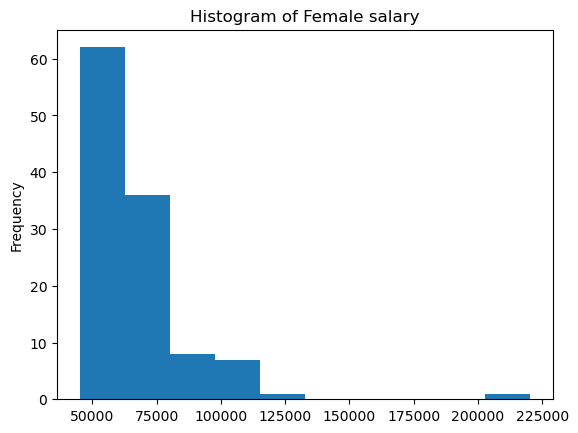

In [ ]:
female_only['Salary'].plot(kind="hist", title="Histogram of Female salary");

In [ ]:
female_mean_salary= round(female_only['Salary'].mean(),2)
female_only['Salary'].fillna(female_mean_salary, inplace=True)

C:\Users\Maryam\AppData\Local\Temp\ipykernel_4808\4209082960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_only['Salary'].fillna(female_mean_salary, inplace=True)


In [ ]:
female_only.isna().sum()

Employee_Name        39
EmpID                 0
Salary                0
PositionID            0
Position              0
DOB                  16
Sex                   0
MaritalDesc           0
RaceDesc              0
DateofHire            0
DateofTermination    96
Department            0
ManagerName           0
ManagerID             0
RecruitmentSource     0
Absences             13
dtype: int64

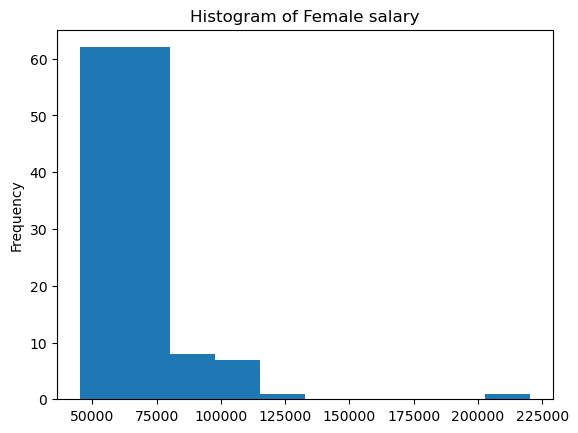

In [ ]:
female_only['Salary'].plot(kind="hist", title="Histogram of Female salary");
# NO big different between this histogram and prevous one so I can consider the method as correct method